In [210]:
import pandas as pd

In [211]:
import numpy as np


In [212]:
from sklearn import preprocessing, svm

In [213]:
from sklearn.linear_model import LinearRegression

In [214]:
from sklearn.model_selection import train_test_split

In [215]:
df = pd.read_csv("/Users/ssrungarapu/Downloads/stock.csv")

In [216]:
df = df[df['symbol'] == "AAPL"]

In [217]:
len(df)

1762

In [218]:
df.set_index("date", drop=True, inplace=True)

In [219]:
df.columns

Index(['symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')

In [220]:
df.fillna(-99999, inplace=True)

In [221]:
df['label'] = df['close'].shift(-30)

In [222]:
df['feature1'] = (df['close'] - df['high'])/df['close']

In [223]:
df['feature2'] = (df['close'] - df['open'])/df['open']

In [224]:
df = df[:-30]

In [225]:
fut_df = df[-30:]

In [226]:
X = np.array(df.drop(['label', 'symbol'], 1))

In [227]:
y = np.array(df['label'])

In [228]:
X = preprocessing.scale(X)

In [229]:
print(len(X), len(y))

1732 1732


In [230]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

In [231]:
clf = LinearRegression()

In [232]:
accuracy = clf.fit(X_train, Y_train)

In [233]:
accuracy = clf.score(X_train, Y_train)

In [234]:
print(accuracy)

0.935375069371


In [235]:
clf.predict(preprocessing.scale(np.array(fut_df.drop(['label', 'symbol'], 1))))

array([  79.46475382,   81.17083962,   98.76037659,   95.49355791,
        104.54447113,  108.38688415,  106.9423394 ,  109.08227411,
        104.67611693,  136.94098818,  104.80413605,   98.38669578,
        106.77771812,  111.28306508,   97.84467439,   85.37606397,
         74.71106998,   74.19519572,   72.75106041,   57.55680716,
         50.34788685,   40.44073094,   51.91157344,   62.81373954,
         69.77673739,   59.84491442,   43.14836835,   32.77085658,
         26.04143069,   59.42725908])

In [236]:
fut_df['label'] = clf.predict(preprocessing.scale(np.array(fut_df.drop(['label', 'symbol'], 1))))

/Users/ssrungarapu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [237]:
df = pd.concat([df, fut_df])

In [238]:
import matplotlib.pyplot as plt

In [239]:
from matplotlib import style

In [240]:
style.use('ggplot')

In [241]:
(df['label']).plot()

In [242]:
plt.legend(loc=4)

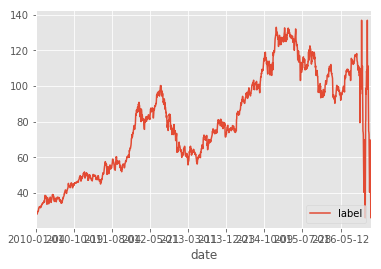

In [243]:
plt.show()